In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd

Read data:

In [2]:
data = pd.read_csv(os.getcwd() + '/Data/brain_tumour.csv')
data.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


Class 0: Not a tumour

Class 1: Brain tumour

Label distro:

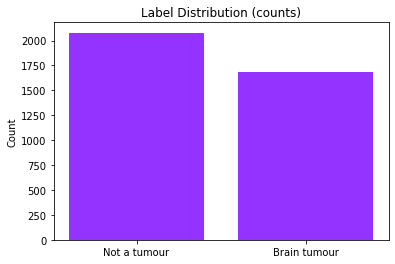

In [7]:
class_distro = data['Class'].value_counts()

plt.bar(['Not a tumour', 'Brain tumour'], class_distro, color = '#9433ff')
plt.title('Label Distribution (counts)')
plt.ylabel('Count')
plt.show()
plt.close()

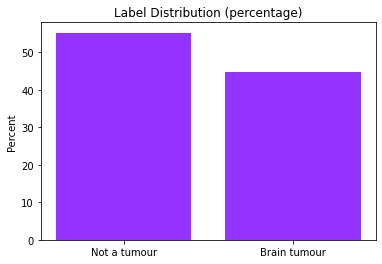

In [8]:
plt.bar(['Not a tumour', 'Brain tumour'], (class_distro / data.shape[0]) * 100, color = '#9433ff')
plt.title('Label Distribution (percentage)')
plt.ylabel('Percent')
plt.show()
plt.close()

Data distro:

In [21]:
log_distro = [False, False, False, False, True, True, True, False, False, False, False, True, True]
# for i in range(len(data.columns[2 :])):
#     print(data.columns[2 :][i], log_distro[i])

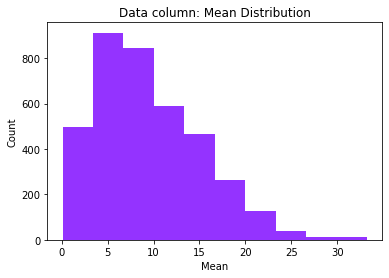

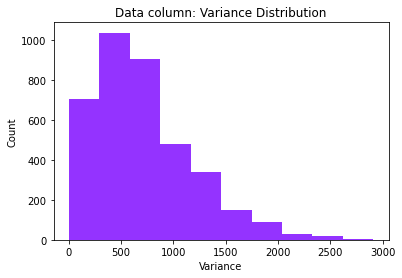

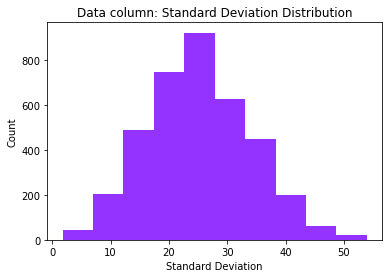

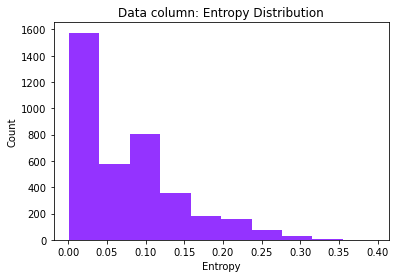

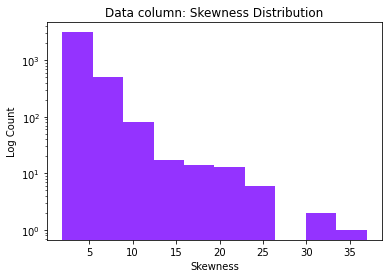

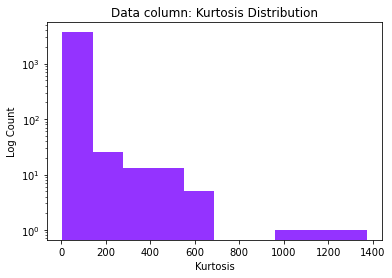

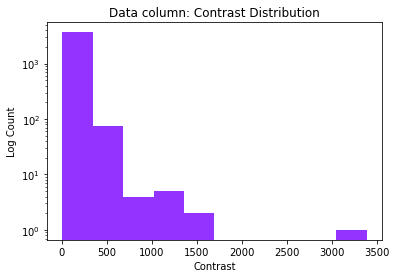

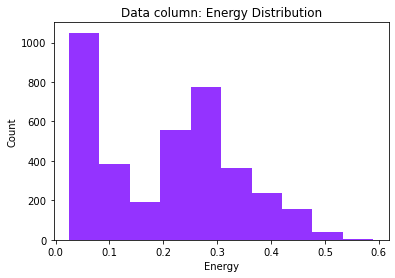

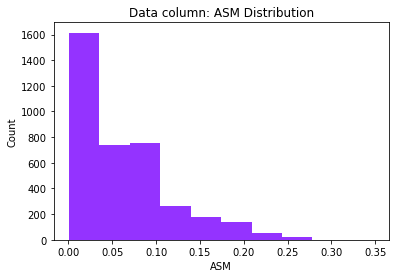

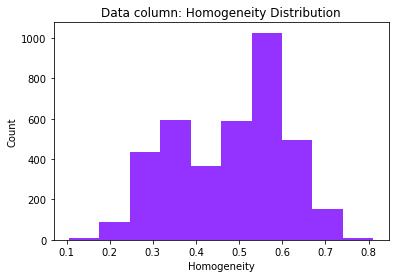

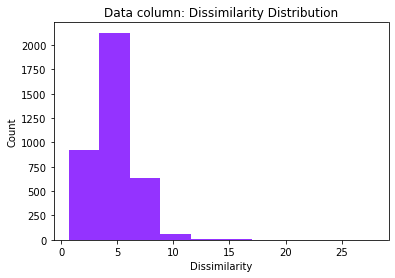

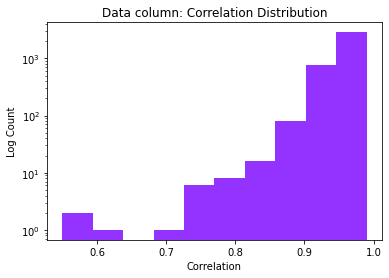

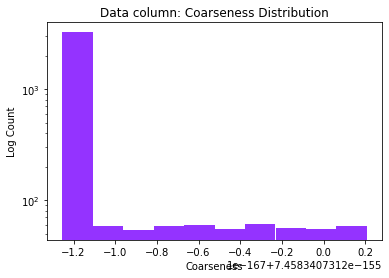

In [26]:
i = 0

for col in data.columns[2 :]:  # skip image and class columns
    if log_distro[i]:  # apply log scale
        plt.hist(data[col], log = True, color = '#9433ff')
        plt.ylabel('Log Count')
    else:
        plt.hist(data[col], color = '#9433ff')
        plt.ylabel('Count')
    plt.title('Data column: ' + col + ' Distribution')
    plt.xlabel(col)
    plt.show()
    plt.close()
    
    i += 1